# 基本图像处理

## 缩放、裁剪和补边 

- 缩放通过cv2.resize()实现
- 裁剪通过array自身的下标截取实现

In [1]:
import cv2
import matplotlib.pyplot as plt
color_img = cv2.imread('./test.jpg')
img_400x400 = cv2.resize(color_img, (400, 400))
img_500x800 = cv2.resize(color_img,(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
cv2.imwrite('resized_400x400.jpg', img_400x400)
cv2.imwrite('resized_0.5x0.5.jpg', img_500x800)

True

- 上下各贴100像素的黑边

In [2]:
img_600x900 = cv2.copyMakeBorder(img_500x800, 100, 100, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
cv2.imwrite('bordered_600x900.jpg', img_600x900)

True

- 裁剪

In [3]:
patch = color_img[20:150, -200:-50]
cv2.imwrite('patch.jpg', patch)

True

## 色调、明暗、直方图和Gamma曲线

- 可以通过HSV空间对色调和明暗进行调节， HSV分别是色调(Hue)、饱和度(Saturation)和明度(Value)
- 在HSV空间中进行调节就避免了直接在RGB空间中调节时还需要考虑3个通道的相关性
- OpenCV中H的取值是[0, 180)， 其他两个通道的取值都是[0, 256)

In [4]:
img_hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
turn_green_hsv =img_hsv.copy()

# H空间中，绿色比黄色的值高一点，所以给每个像素+15，黄色的树叶就会变绿
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0] + 15) % 180
turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
cv2.imshow("1", turn_green_img)
cv2.waitKey(0)

-1

- 减小饱和度会让图像损失鲜艳，变得更灰

In [5]:
colorless_hsv = img_hsv.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]
colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
cv2.imshow('2', colorless_img)
cv2.waitKey(0)

-1

- 减小明度为原来的一半

In [6]:
darker_hsv = img_hsv.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]
darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
cv2.imshow('3', darker_img)
cv2.waitKey(0)

-1

## 通过Gamma变换提升暗部细节
- Gamma变换是矫正相机直接成像和人眼感受图像差别的一种常用手段，通过非线性变换，让图像从对曝光强度的线性响应变得更接近人眼感受到的响应

In [13]:
import numpy as np
import cv2

def gamma_trans(img, gamma):
    gamma_table = [np.power(x/255.0, gamma) * 255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    #　使用OpenCV的查表函数是实现映射
    return cv2.LUT(img, gamma_table)

img_corrected = gamma_trans(color_img, 0.5)
cv2.imshow('4', img_corrected)
cv2.imshow('5', color_img)
cv2.waitKey(0)

-1

- 将直方图进行可视化

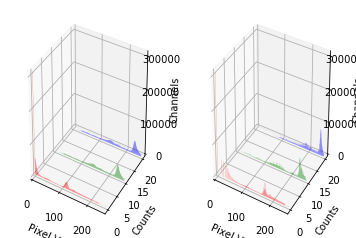

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
hist_b = cv2.calcHist([color_img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([color_img], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([color_img], [2], None, [256], [0, 256])

hist_b_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])
hist_g_corrected = cv2.calcHist([img_corrected], [1], None, [256], [0, 256])
hist_r_corrected = cv2.calcHist([img_corrected], [2], None, [256], [0, 256])

fig = plt.figure()
pix_hists = [[hist_b, hist_g, hist_r], [hist_b_corrected, hist_g_corrected, hist_r_corrected]]
pix_vals = range(256)
for sub_plt, pix_hist in zip([121, 122], pix_hists):
    ax = fig.add_subplot(sub_plt, projection='3d')
    for c, z, channel_hist in zip(['b', 'g', 'r'], [20, 10, 0], pix_hist):
        cs = [c] * 256
        ax.bar(pix_vals, channel_hist, zs=z, zdir='y', color=cs, alpha=0.618, edgecolor='none', lw=0)
    ax.set_xlabel('Pixel Values')
    ax.set_xlim([0, 256])
    ax.set_ylabel('Counts')
    ax.set_zlabel('Channels')
plt.show()